# Sales Analysis

# Import necessary libraries

In [1]:
import os
import pandas as pd

# Merge data from each month into one CSV

In [2]:

# Define the path to your folder containing monthly sales CSV files
path = r"D:\MBA\Projects\Python Projects\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data"

# Get list of all CSV files in the directory (ignoring hidden files)
files = [file for file in os.listdir(path) if not file.startswith('.')]

# Create an empty DataFrame to store all data
all_months_data = pd.DataFrame()

# Loop through the files and append them to the master DataFrame
for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data_copy.csv", index=False)
    




# Read in updated dataframe

In [3]:
all_data = pd.read_csv("all_data_copy.csv")
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Clean up the data!

#The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

In [4]:
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001"


# Get rid of text in order date column

In [5]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

# Make columns correct type

In [6]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

# Augment data with additional columns

In [7]:
# Step 1: Drop rows where 'Order Date' is NaN (missing)
all_data = all_data[all_data['Order Date'].notna()]

# Step 2: Drop rows where 'Order Date' is something like 'Order Date' (header)
all_data = all_data[all_data['Order Date'].str[0:2].str.isnumeric()]

# Step 3: Extract the month as integer
all_data['Month'] = all_data['Order Date'].str[0:2].astype('int32')

# Step 4: Preview the result
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
18383,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8
18384,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8
18385,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8
18386,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8
18387,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8


# Add city column

In [8]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
18383,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,Seattle (WA)
18384,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,Dallas (TX)
18385,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,Portland (OR)
18386,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,Los Angeles (CA)
18387,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,New York City (NY)


# Data Exploration!

#Question 1: What was the best month for sales? How much was earned that month?

In [9]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')

In [10]:
all_data.groupby(['Month']).sum()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Sales
Month,,,,,,,,
1,2971502978172978172979692983442990492991253003...,Lightning Charging CableiPhoneLightning Chargi...,32709,5435305.14,01/01/20 00:3801/01/20 00:2201/01/20 00:2201/0...,"427 Wilson St, Dallas, TX 75001519 13th St, Ne...",Dallas (TX)New York City (NY)New York City ...,5466770.19
2,1505021505031505041505051505061505071505081505...,iPhoneAA Batteries (4-pack)27in 4K Gaming Moni...,40347,6566654.16,02/18/19 01:3502/13/19 07:2402/18/19 09:4602/0...,"866 Spruce St, Portland, ME 0410118 13th St, S...",Portland (ME)San Francisco (CA)New York City...,6606067.26
3,1505331505411508121517491520361532841535441538...,AAA Batteries (4-pack)AAA Batteries (4-pack)Wi...,51015,8373623.49,03/01/19 03:0603/01/19 01:0303/01/19 02:1803/0...,"270 Dogwood St, San Francisco, CA 94016683 Ada...",San Francisco (CA)Portland (OR)San Francisco...,8421301.14
4,1623581625411650071656221662501663091665671672...,Flatscreen TVAAA Batteries (4-pack)34in Ultraw...,57,15502.29,04/01/19 01:1104/01/19 01:1504/01/19 00:1204/0...,"444 12th St, New York City, NY 10001672 2nd St...",New York City (NY)Atlanta (GA)New York City ...,15511.26
5,1940951940961940971940981940991941001941011941...,Wired HeadphonesAA Batteries (4-pack)27in FHD ...,55914,9373709.04,05/16/19 17:1405/19/19 14:4305/24/19 11:3605/0...,"669 2nd St, New York City, NY 10001844 Walnut ...",New York City (NY)Dallas (TX)New York City ...,9426142.38
6,2099212099222099232099242099252099262099272099...,USB-C Charging CableMacbook Pro LaptopThinkPad...,45759,7686076.83,06/23/19 19:3406/30/19 10:0506/24/19 20:1806/0...,"950 Walnut St, Portland, ME 0410180 4th St, Sa...",Portland (ME)San Francisco (CA)Los Angeles ...,7733406.78
7,2229102229112229122229132229142229152229162229...,Apple Airpods HeadphonesFlatscreen TVAA Batter...,48216,7897618.68,07/26/19 16:5107/05/19 08:5507/29/19 12:4107/2...,"389 South St, Atlanta, GA 30301590 4th St, Sea...",Atlanta (GA)Seattle (WA)Atlanta (GA)Atlanta...,7943327.28
8,2366702366712366722366732366742366752366762366...,Wired HeadphonesBose SoundSport HeadphonesiPho...,40344,6691036.26,08/31/19 22:2108/15/19 15:1108/06/19 14:4008/2...,"359 Spruce St, Seattle, WA 98101492 Ridge St, ...",Seattle (WA)Dallas (TX)Portland (OR)Los Ang...,6733403.64
9,2388342392852406362410542423432428652436672449...,Apple Airpods Headphones34in Ultrawide Monitor...,39327,6254976.27,09/01/19 04:1309/01/19 01:0909/01/19 02:0709/0...,"761 Forest St, San Francisco, CA 94016373 1st ...",San Francisco (CA)San Francisco (CA)Seattle ...,6292680.39


range(1, 13)


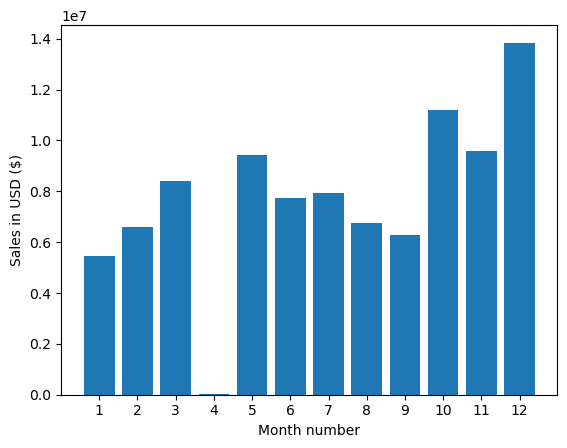

In [11]:
import matplotlib.pyplot as plt

months = range(1,13)
print(months)

plt.bar(months,all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

#Question 2: What city sold the most product?

In [13]:
all_data.groupby(['City']).sum()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
City,,,,,,,,
Atlanta (GA),2366852366992367032367142367172367192367442367...,Apple Airpods HeadphonesAA Batteries (4-pack)B...,44907,7491084.96,08/23/19 19:2908/20/19 21:0708/08/19 06:0908/3...,"238 Highland St, Atlanta, GA 30301763 Hill St,...",296715,7533130.98
Austin (TX),2367052367102367492367522367732367742367952368...,AA Batteries (4-pack)Macbook Pro LaptopAAA Bat...,30183,4915157.88,08/11/19 22:2108/04/19 02:4608/30/19 20:1308/2...,"27 North St, Austin, TX 73301654 Chestnut St, ...",197811,4940694.48
Boston (MA),2366812366912367122367262367352367392367412367...,AA Batteries (4-pack)USB-C Charging CableAA Ba...,61014,9857001.06,08/26/19 20:5208/23/19 07:3408/30/19 07:1408/2...,"295 1st St, Boston, MA 02215916 Meadow St, Bos...",400302,9923285.55
Dallas (TX),2366712366832366862366982367022367112367202367...,Bose SoundSport Headphones27in FHD MonitorAAA ...,45633,7502816.34,08/15/19 15:1108/31/19 15:4708/15/19 19:1308/0...,"492 Ridge St, Dallas, TX 75001196 West St, Dal...",297654,7545404.79
Los Angeles (CA),2366732366762366792366882367002367072367362367...,AA Batteries (4-pack)34in Ultrawide MonitorMac...,89670,14620332.63,08/29/19 20:5908/04/19 19:5208/07/19 15:4308/0...,"631 2nd St, Los Angeles, CA 90001470 Cherry St...",588654,14703515.19
New York City (NY),2366742366842366872366942366962367232367272367...,AA Batteries (4-pack)Lightning Charging CableU...,75573,12578934.45,08/15/19 19:5308/09/19 16:5008/23/19 12:5408/1...,"736 14th St, New York City, NY 10001669 12th S...",498012,12653188.95
Portland (ME),2367282367512368152368662368912369002369662372...,ThinkPad Laptop27in 4K Gaming Monitor27in FHD ...,7455,1214456.88,08/10/19 11:2108/03/19 09:1808/28/19 17:5508/1...,"526 North St, Portland, ME 04101534 Washington...",48516,1221665.34
Portland (OR),2366722366822366932367152367682367722368422368...,iPhoneAA Batteries (4-pack)27in 4K Gaming Moni...,30507,4988506.77,08/06/19 14:4008/19/19 12:4008/12/19 21:5708/2...,"149 7th St, Portland, OR 97035118 Johnson St, ...",199929,5016422.16
San Francisco (CA),2366752366772366782366802366892366902366922366...,Wired Headphones20in MonitorWired HeadphonesLG...,135756,22203370.29,08/02/19 23:5408/13/19 07:1608/25/19 20:1108/0...,"470 Hill St, San Francisco, CA 94016918 6th St...",893280,22335387.42


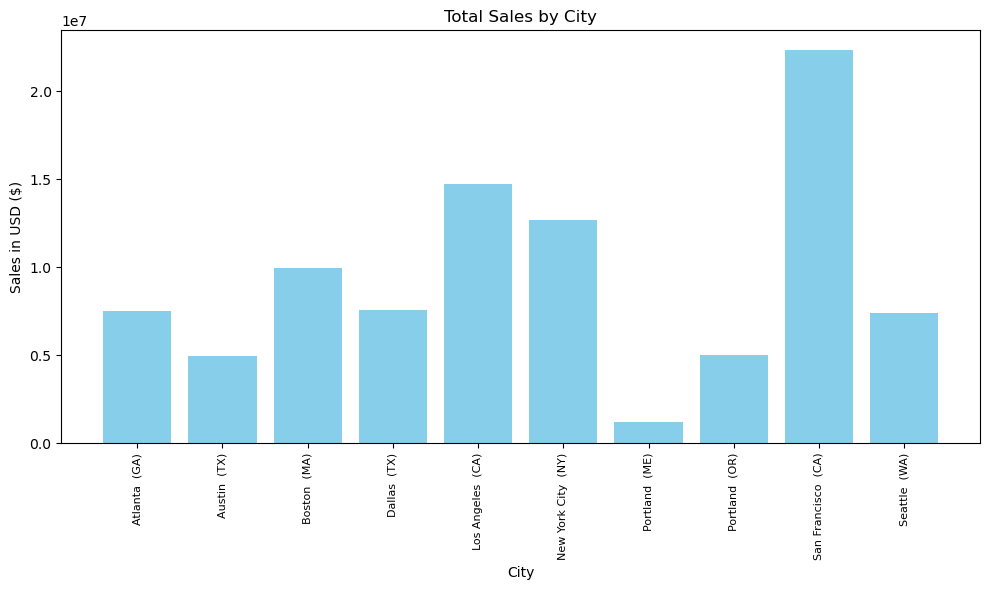

In [25]:
import matplotlib.pyplot as plt

# Group sales by city
city_sales = all_data.groupby('City')['Sales'].sum()

# Plot
plt.figure(figsize=(10,6))
plt.bar(city_sales.index, city_sales.values, color='skyblue')
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.title('Total Sales by City')
plt.xticks(rotation='vertical', fontsize=8)
plt.tight_layout()
plt.show()

#Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [14]:
# Add hour column
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12480\2818534198.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12480\2818534198.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
18383,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,Seattle (WA),23.98,22,21,1
18384,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,Dallas (TX),99.99,15,11,1
18385,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,Portland (OR),700.00,14,40,1
18386,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,Los Angeles (CA),7.68,20,59,1
18387,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,New York City (NY),7.68,19,53,1


In [22]:
# Convert 'Order Date' column to datetime format (skip if already done)
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], errors='coerce')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15376\3102901059.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], errors='coerce')


In [23]:
# Drop rows where 'Order Date' couldn't be converted
all_data = all_data.dropna(subset=['Order Date'])

# Extract 'Hour' from the datetime column
all_data['Hour'] = all_data['Order Date'].dt.hour

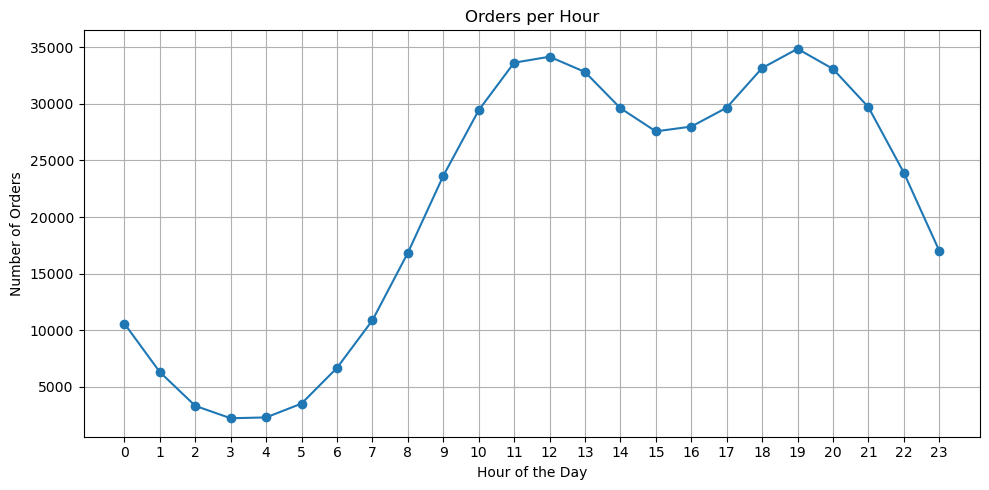

In [24]:
import matplotlib.pyplot as plt

# Group and count orders by hour
hourly_orders = all_data.groupby('Hour').size()

# Plot
plt.figure(figsize=(10,5))
plt.plot(hourly_orders.index, hourly_orders.values, marker='o')
plt.xticks(hourly_orders.index)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Orders per Hour')
plt.grid(True)
plt.tight_layout()
plt.show()

#Question 4: What products are most often sold together?

In [16]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = all_data[all_data['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

In [17]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('USB-C Charging Cable', 'USB-C Charging Cable') 59868
('Lightning Charging Cable', 'Lightning Charging Cable') 58803
('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)') 56352
('AA Batteries (4-pack)', 'AA Batteries (4-pack)') 55830
('Wired Headphones', 'Wired Headphones') 51282
('Apple Airpods Headphones', 'Apple Airpods Headphones') 42300
('Bose SoundSport Headphones', 'Bose SoundSport Headphones') 36360
('27in FHD Monitor', '27in FHD Monitor') 20400
('iPhone', 'iPhone') 18465
('27in 4K Gaming Monitor', '27in 4K Gaming Monitor') 17046


# What product sold the most? Why do you think it sold the most?

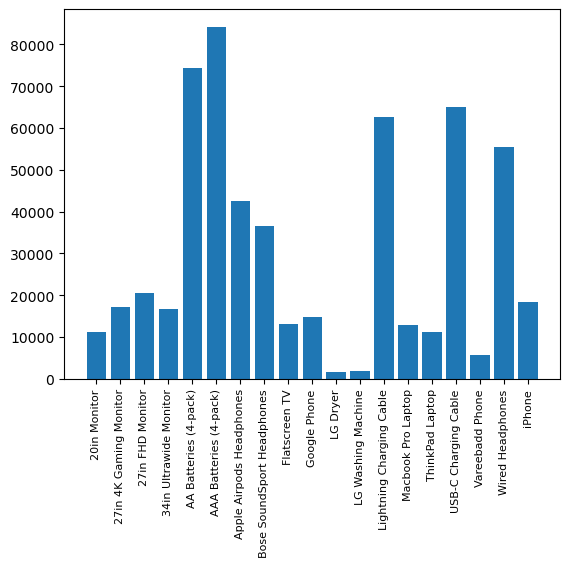

In [17]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

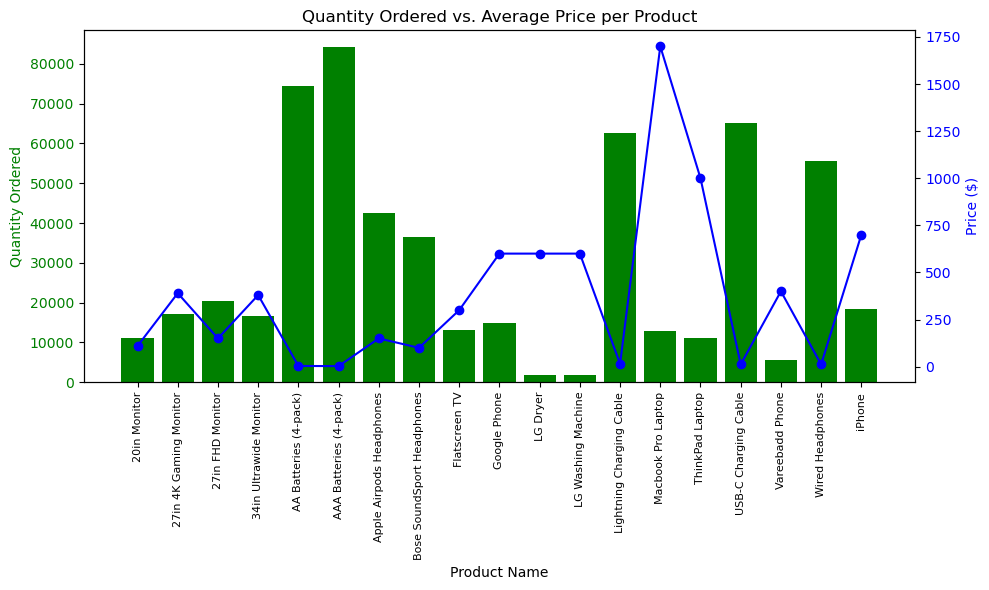

In [20]:
import matplotlib.pyplot as plt

# Grouping by Product
product_group = all_data.groupby('Product')
quantity_ordered = product_group['Quantity Ordered'].sum()
prices = product_group['Price Each'].mean()
keys = quantity_ordered.index  # Product names

# Create dual-axis plot
fig, ax1 = plt.subplots(figsize=(10,6))

# First axis (bar chart)
ax1.bar(keys, quantity_ordered, color='g')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax1.tick_params(axis='y', labelcolor='g')
ax1.set_xticks(range(len(keys)))
ax1.set_xticklabels(keys, rotation='vertical', fontsize=8)

# Second axis (line chart)
ax2 = ax1.twinx()
ax2.plot(range(len(keys)), prices, color='b', marker='o')
ax2.set_ylabel('Price ($)', color='b')
ax2.tick_params(axis='y', labelcolor='b')

plt.title('Quantity Ordered vs. Average Price per Product')
plt.tight_layout()
plt.show()
